#  <span style="color:blue">  Introduction to Neural Networks</span>

## <span style="color:red">Licence Professionnelle en Big Data et Intelligence Artificielle </span>

### <span style="color:purple">Réalisée par:</span> EZ-ZARZOURI Houda

## <span style="color:red">Objectifs :</span>
Dans cet exercice, vous comparerez les résultats d'implémentation d'une régression logistique et d'un réseau de neurones pour un problème non linéaire.
Vous suivrez différentes étapes pour implémenter et tester un modèle de régression logistique :
+ Importez les bibliothèques et les données, en identifiant les variables dépendantes et indépendantes
+ Codez les fonctions nécessaires (fonction sigmoïde, le modèle, la fonction de coût, le gradient et la descente de gradient)
+ Évaluez les performances du modèle

### <span style="color:red">. Import the librairies and the data</span>

Dans cet exercice, nous allons implémenter la régression logistique. L'objectif principal est de bien comprendre son fonctionnement et comment nous pouvons évaluer l'évolution de l'entraînement et les performances du modèle. Nous devrons importer les bibliothèques suivantes:

- Numpy
- Matplotlib.pyplot
- from sklearn.datasets import make_blobs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### <span style="color:red"> 1. Data load and visualization </span> 

Cet exercice consiste à créer un jeu de données fictif pour effectuer une comparaison ultérieure. Pour ce faire, nous allons générer deux vecteurs aléatoires x1 et x2 à l'aide de la fonction np.random.uniform, qui retourne des nombres aléatoires uniformément répartis dans l'intervalle donné.
- La fonction np.random.uniform prend trois arguments : le minimum de l'intervalle, le maximum de l'intervalle et le nombre de valeurs à générer. Dans ce cas, nous avons choisi un intervalle de -1 à 1 et généré 500 valeurs pour chaque vecteur x1 et x2.

In [2]:
x1 = np.random.uniform(-1, 1, 500)
x2 = np.random.uniform(-1, 1, 500)

In [3]:
#afficher les 5 premiers éléments des vecteurs x1 et x2 respectivement.
x1[:5],x2[:5]

(array([ 0.23050108,  0.62191503,  0.3385804 , -0.07482202, -0.29558488]),
 array([ 0.17911024, -0.86320843,  0.74953114, -0.82644859, -0.17336589]))

Nous utiliserons ensuite la fonction np.column_stack pour fusionner les deux vecteurs en une seule matrice X à deux colonnes.
- Crée une matrice X à partir de deux vecteurs x1 et x2 en les empilant en colonnes.Elle prend les vecteurs x1 et x2 et les empile en colonnes pour créer une matrice X à deux colonnes.

In [4]:
X = np.column_stack((x1, x2))


In [5]:
X[:5]

array([[ 0.23050108,  0.17911024],
       [ 0.62191503, -0.86320843],
       [ 0.3385804 ,  0.74953114],
       [-0.07482202, -0.82644859],
       [-0.29558488, -0.17336589]])

In [6]:
print("Dimensions de X : ",X.shape)
print("Dimensions de x1 : ",x1.shape)
print("Dimensions de x2 : ",x2.shape)


Dimensions de X :  (500, 2)
Dimensions de x1 :  (500,)
Dimensions de x2 :  (500,)


Ce code divise les exemples de la matrice X en deux catégories, 0 et 1, en fonction de la valeur de leur produit x1 * x2. Un exemple est placé dans la catégorie 0 si x1 * x2 est négatif et dans la catégorie 1 sinon.
- Pour sélectionner les exemples de la catégorie 1, la ligne de code suivante est utilisée :

In [7]:
X1 = X[x1*x2>=0]

-> Cela crée une nouvelle matrice X1 contenant tous les exemples de la matrice X pour lesquels x1 * x2 est positif ou nul.

- Pour sélectionner les exemples de la catégorie 0, la ligne de code suivante est utilisée :

In [8]:
X0 = X[x1*x2<0]

-> Cela crée une nouvelle matrice X0 contenant tous les exemples de la matrice X pour lesquels x1 * x2 est négatif. 

Ensuite, deux visualisations en nuage de points sont créées pour afficher les exemples des deux catégories séparément.
- Les lignes de code suivante affiche les exemples de la catégorie 0 et de la catégorie 1:

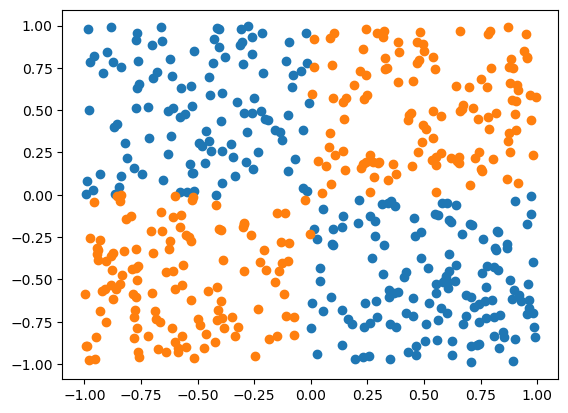

In [9]:
plt.scatter(X0[:,0],X0[:,1])
plt.scatter(X1[:,0],X1[:,1])
plt.show()

<span style="color:red">- What do you notice ?</span> 
=> À partir du graphique, nous pouvons constater que les deux catégories ne sont pas séparables linéairement (entrelacées).

<span style="color:red">- Is it possible to use a logistic regression to separate the two categories ?</span>
=> Non, il n'est pas possible d'utiliser une régression logistique pour séparer parfaitement les deux catégories car les deux catégories ne sont pas séparables linéairement car à partir du graphique, nous pouvons voir que les deux catégories ne sont pas séparables linéairement

Ceci est un ensemble de données non linéaire, donc nous avons besoin d'un modèle non linéaire pour effectuer la classification.

Pour ce faire, nous utiliserons deux approches :

• Utilisation de la régression logistique en combinant les deux caractéristiques en une seule caractéristique.

• Utilisation d'un réseau de neurones.

### <span style="color:red">Implementation of logistic regression</span> 

La catégorisation de l'exemple est basée sur le produit x1x2, comme indiqué ci-dessus. Par conséquent, nous pouvons considérer la caractéristique x1x2 au lieu des deux caractéristiques x1 et x2 pour tous les exemples de l'ensemble de données.
- Si x1x2 >= 0, alors l'étiquette y = 1
- Si x1x2 < 0, alors l'étiquette y = 0
Pour cela, vous tapez les instructions suivantes :

In [33]:
U1 = X1[:,0] * X1[:,1]
y1 = np.ones(len(U1))
U0 = X0[:,0] * X0[:,1]
y0 = np.zeros(len(U0))
print('U1 et y1 ',U1[:5],y1[:5])
print('U0 et y0 ',U0[:5],y0[:5])

U1 et y1  [0.04128511 0.25377655 0.06183655 0.05124434 0.00078736] [1. 1. 1. 1. 1.]
U0 et y0  [-0.5368423  -0.6861839  -0.49938863 -0.38613658 -0.19213217] [0. 0. 0. 0. 0.]


-> Ce code sert à créer des vecteurs U1 et U0 à partir des données d'entrée X1 et X0, respectivement. Les éléments de U1 et U0 sont les produits de la première et de la deuxième colonne de X1 et X0, respectivement. Les vecteurs y1 et y0 sont les étiquettes pour chaque exemple, qui sont toutes des 1 pour y1 et toutes des 0 pour y0.

La première ligne crée le vecteur U1 en multipliant la première et la deuxième colonne de X1. La deuxième ligne crée le vecteur y1 en créant un vecteur de longueur égale à la longueur de U1 et en remplissant toutes les valeurs avec des 1.

Les deux lignes suivantes font de même pour les vecteurs U0 et y0 à partir des données X0. Les deux dernières lignes affichent les cinq premières valeurs de chaque vecteur.

Nous pouvons tracer les exemples des deux catégories pour visualiser le nouvel ensemble de données.
L'ensemble de données complet est la concaténation de U1 et U2.
- Nous concaténons les caractéristiques en tapant: U = np.concatenate((U0, U1)) puis nous les remodelons en utilisant U = np.c_[U] pour être utilisé par scikit-learn.
- Nous devons également concaténer les étiquettes: U_y = np.concatenate((y0, y1))

In [34]:
U = np.concatenate((U0, U1))
U = np.c_[U] # reshape
U_y = np.concatenate((y0, y1))
U_y[:8]

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
U.shape

(500, 1)

Le code suivant définit et entraîne un modèle de régression logistique en utilisant la bibliothèque de Machine Learning Python scikit-learn :

In [36]:
regressor = LogisticRegression(random_state=0, solver='lbfgs').fit(U, U_y)
regressor

LogisticRegression(random_state=0)

Explication :

- <span style="color:green">LogisticRegression():</span> est une classe dans la bibliothèque scikit-learn qui implémente un modèle de régression logistique.
- <span style="color:green">random_state=0:</span> définit la graine pour l'initialisation des nombres aléatoires afin que les résultats soient reproductibles.
- <span style="color:green">solver='lbfgs':</span> spécifie l'algorithme d'optimisation utilisé pour minimiser la fonction de coût. Ici, lbfgs est une méthode d'optimisation quasi-Newtonienne qui est couramment utilisée pour les problèmes de classification.
- <span style="color:green">fit(U, U_y):</span> est une méthode de la classe LogisticRegression qui ajuste le modèle aux données d'entraînement. U est la matrice des caractéristiques (variables explicatives) et U_y est le vecteur des étiquettes de classe (variables cibles) correspondantes.
- Le modèle entraîné est stocké dans la variable regressor.

Le code suivant utilise le modèle de régression logistique regressor précédemment défini pour prédire les probabilités d'appartenance à la classe positive pour une plage de valeurs de la variable d'entrée (caractéristique) linx, puis trace la courbe de probabilité prédite et les données d'entraînement : 

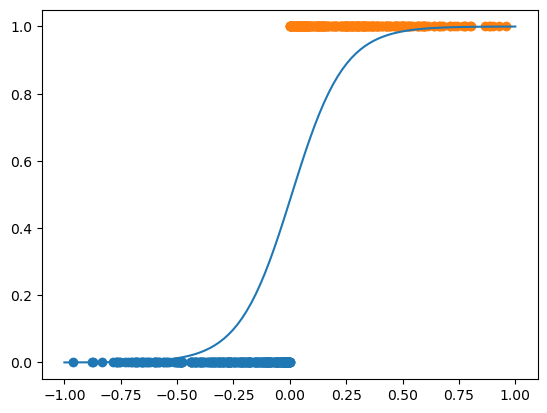

In [37]:
linx = np.c_[np.linspace(-1, 1, 100)]
prob = regressor.predict_proba(linx)
prob = prob[:,1].reshape(len(linx))
plt.plot(linx, prob)
plt.scatter(U0, y0)
plt.scatter(U1, y1)


- <span style="color:green">np.linspace(-1, 1, 100): </span> crée un vecteur de 100 valeurs équidistantes allant de -1 à 1 inclus.
- <span style="color:green">np.c_[np.linspace(-1, 1, 100)]:</span> transforme le vecteur en une matrice colonne de 100 lignes, qui sera utilisée comme entrée pour la prédiction de probabilité.
- <span style="color:green">regressor.predict_proba(linx): </span> prédit les probabilités d'appartenance aux deux classes pour chaque valeur d'entrée dans linx. La méthode predict_proba retourne un tableau de deux colonnes, la première colonne représentant les probabilités d'appartenance à la classe négative et la deuxième colonne représentant les probabilités d'appartenance à la classe positive.
- <span style="color:green">prob[:,1].reshape(len(linx)):</span> sélectionne la deuxième colonne (les probabilités de la classe positive) et les reforme en un tableau de forme (100, 1).
- <span style="color:green">plt.plot(linx, prob): </span> trace la courbe des probabilités prédites en fonction de la variable d'entrée linx.
- <span style="color:green">plt.scatter(U0, y0): </span> trace les points de données d'entraînement appartenant à la classe négative.
- <span style="color:green">plt.scatter(U1, y1): </span> trace les points de données d'entraînement appartenant à la classe positive.
- ==> Le résultat obtenu est un graphique avec la courbe de probabilité prédite et les points de données d'entraînement de chaque classe. Ce graphique permettra de visualiser comment le modèle de régression logistique sépare les deux classes en fonction de la variable d'entrée.
- ==> Nous pouvons constater que le modèle de régression logistique n'est pas en mesure de capturer la relation non linéaire entre les caractéristiques et les étiquettes. Par conséquent, les probabilités prédites forment une ligne droite qui ne sépare pas de manière précise les deux catégories.

l'instruction suivante pour plus de visualisation :

Text(0, 0.5, 'x2')

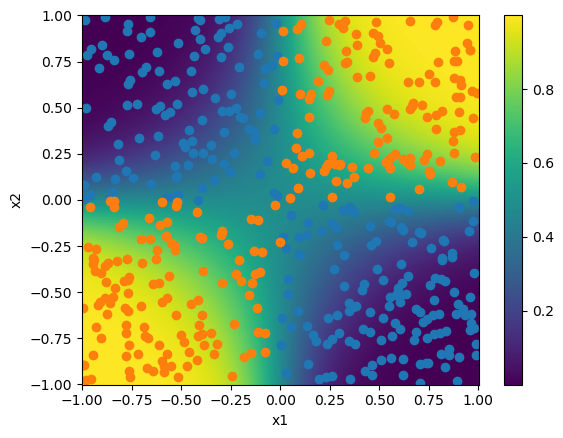

In [38]:
xmin, xmax, npoints = -1, 1, 500
gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
gridu = gridx1 * gridx2
us = np.c_[gridu.flatten()]
probs = regressor.predict_proba(us)
plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints), shading='auto')
plt.colorbar()
plt.scatter(X0[:,0], X0[:,1])
plt.scatter(X1[:,0], X1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')


Explication :

- <span style="color:green">xmin, xmax, npoints = -1, 1, 500:</span> définit les bornes de la plage de valeurs pour les variables d'entrée x1 et x2, ainsi que le nombre de points pour la discrétisation de la plage.
- <span style="color:green">gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))::</span> crée deux matrices 2D, gridx1 et gridx2, contenant toutes les combinaisons possibles des valeurs de x1 et x2 dans la plage définie.
- <span style="color:green">gridu = gridx1 * gridx2:</span> calcule le produit élément par élément des deux matrices pour obtenir une matrice 2D contenant les valeurs de u= x1 * x2 pour chaque combinaison de x1 et x2.
- <span style="color:green">us = np.c_[gridu.flatten()]:</span> convertit la matrice 2D gridu en un tableau 1D us en aplatisant les valeurs de la matrice.
- <span style="color:green">probs = regressor.predict_proba(us):</span> prédit les probabilités d'appartenance à la classe positive pour toutes les combinaisons de valeurs de x1 et x2 contenues dans us.
- <span style="color:green">plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints), shading='auto'):</span> trace une carte de chaleur (heatmap) des probabilités prédites pour toutes les combinaisons de valeurs de x1 et x2 contenues dans us. La deuxième colonne de probs contient les probabilités d'appartenance à la classe positive. probs[:,1].reshape(npoints,npoints) transforme le tableau en une matrice 2D ayant la même forme que gridx1 et gridx2.
- <span style="color:green">plt.colorbar():</span> affiche la légende de la carte de chaleur.
- <span style="color:green">plt.scatter(X0[:,0], X0[:,1]):</span> trace les points de données de la classe négative sur le même graphique.
- <span style="color:green">plt.scatter(X1[:,0], X1[:,1]):</span> trace les points de données de la classe positive sur le même graphique.
- <span style="color:green">plt.xlabel('x1'):</span> définit l'étiquette de l'axe x comme 'x1'.
- <span style="color:green">plt.ylabel('x2'):</span> définit l'étiquette de l'axe y comme 'x2'. 

In [39]:
# Calculer la précision du modèle
accuracy = regressor.score(U.reshape(-1,1), U_y)
print("Accuracy:", accuracy)

Accuracy: 0.976


### <span style="color:red"> Implementation of a Neural Network with one hidden layer </span> 

Pour entraîner le modèle de réseau de neurones, nous utiliserons le même ensemble de données déjà défini.

- Premièrement, concaténez X0 avec X1 et y0 avec y1 en utilisant la méthode concatenate().

In [40]:
# Concaténez X0 avec X1 et y0 avec y1
X = np.concatenate((X0, X1))
y = np.concatenate((y0, y1))

Ensuite, nous devons importer MLPClassifier de sklearn.neural_network.

In [41]:
from sklearn.neural_network import MLPClassifier


Nous utiliserons la fonction d'activation ReLu

In [42]:
# Définir le modèle
mlp = MLPClassifier(hidden_layer_sizes=(50), activation='relu', max_iter=10000)
# Entraîner le modèle
mlp.fit(X, y)

MLPClassifier(hidden_layer_sizes=50, max_iter=10000)

Explication :

- Nous importons les bibliothèques nécessaires, y compris MLPClassifier de sklearn.neural_network.
- Nous concaténons les données d'entraînement X0 et X1 pour former la matrice X et les étiquettes d'entraînement y0 et y1 pour former le vecteur y.
- Nous définissons le modèle en utilisant MLPClassifier et en spécifiant une couche cachée de 50 neurones et une fonction d'activation ReLu.
- Nous entraînons le modèle en utilisant les données d'entraînement X et y. Le modèle utilise la méthode de rétropropagation pour ajuster les poids des neurones afin de minimiser la fonction de coût. Le nombre maximum d'itérations est défini à 10000 pour s'assurer que le modèle a suffisamment de temps pour converger. 

Explication des paramètres utilisés avec MLPClassifier :

- <span style="color:green">hidden_layer_sizes :</span> il s'agit d'un tuple qui indique le nombre de neurones dans chaque couche cachée du réseau de neurones. Dans l'exemple donné, il n'y a qu'une seule couche cachée avec 50 neurones.
- <span style="color:green">activation :</span> il s'agit de la fonction d'activation utilisée pour la couche cachée. Dans cet exemple, il s'agit de la fonction d'activation ReLU.
- <span style="color:green">max_iter :</span> il s'agit du nombre maximum d'itérations que le modèle effectue avant de s'arrêter. Dans cet exemple, il est défini à 10000.
 - D'autres paramètres qui peuvent être fixés pour le classificateur de réseau de neurones (NN) sont les suivants :

- <span style="color:green">solver :</span> il s'agit de l'optimiseur utilisé pour résoudre le problème d'optimisation lors de l'apprentissage. Les options disponibles sont "lbfgs", "sgd" et "adam". Par défaut, c'est "adam".
- <span style="color:green">alpha :</span> il s'agit du paramètre de régularisation pour contrôler le surapprentissage. Plus la valeur est grande, plus la régularisation est forte. Par défaut, c'est 0.0001.
- <span style="color:green">learning_rate :</span> il s'agit de la méthode d'apprentissage utilisée pour mettre à jour les poids du modèle. Les options disponibles sont "constant", "invscaling" et "adaptive". Par défaut, c'est "constant".
- <span style="color:green">learning_rate_init :</span> il s'agit du taux d'apprentissage initial pour mettre à jour les poids du modèle. Par défaut, c'est 0.001.

Une fois que le modèle est entraîné, nous devons le tester avec un autre ensemble de données. Pour cela, nous allons générer un nouvel ensemble de données comme nous l'avons fait auparavant en utilisant les instructions suivantes :

In [43]:
x1 = np.random.uniform(-1, 1, 300)
x2 = np.random.uniform(-1, 1, 300)
x = np.column_stack((x1, x2))
xt0 = x[x1*x2>0]
xt1 = x[x1*x2<0]
yt0 = np.ones(len(xt0))
yt1 = np.zeros(len(xt1))
xt = np.c_[np.concatenate((xt0,xt1))]
yt = np.concatenate((yt0,yt1))

- Les instructions ci-dessus génèrent un nouvel ensemble de données pour tester le modèle MLP entraîné.

- On génère deux vecteurs aléatoires uniformément distribués entre -1 et 1, de longueur 300, que l'on nomme x1 et x2.
- Ensuite, on empile ces deux vecteurs en colonnes pour former une matrice x de taille (300, 2).
- On sélectionne les lignes de la matrice x où x1 * x2 est supérieur à zéro et où x1 * x2 est inférieur à zéro, et on les stocke dans les matrices xt0 et xt1 respectivement.
- On crée également les vecteurs de labels yt0 et yt1 qui contiennent des 1 pour xt0 et des 0 pour xt1.
- Enfin, on concatène les matrices xt0 et xt1 en une seule matrice xt et on concatène les vecteurs yt0 et yt1 en un seul vecteur yt.

Plot the shape of the generated vector and matrix 

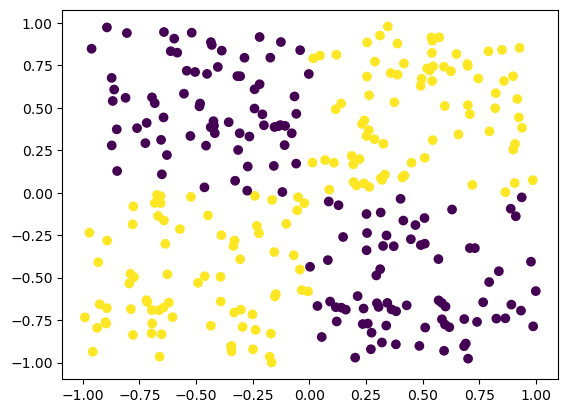

In [44]:
plt.scatter(xt[:,0], xt[:,1], c=yt)
plt.show()

In [45]:
print('Dimension de  xt',xt.shape)
print('Dimension de yt',yt.shape)

Dimension de  xt (300, 2)
Dimension de yt (300,)


In [60]:
y_pred = mlp.predict(xt)

Après avoir généré le nouvel ensemble de données et entraîné le modèle, nous pouvons calculer l'exactitude du MLP et visualiser les données dans une grille.

In [46]:
# Calculate accuracy of MLP on new dataset
accuracy = mlp.score(xt, yt)
print("Accuracy of MLP on new dataset:", accuracy)

Accuracy of MLP on new dataset: 0.9933333333333333


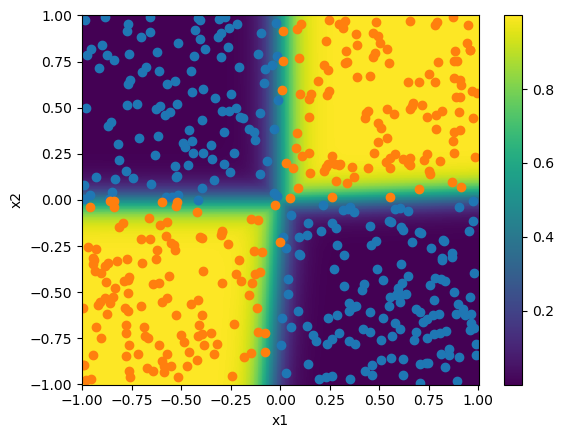

In [47]:
# Create a meshgrid to generate a grid of points for plotting
xmin, xmax, npoints = -1, 1, 500
gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints)) 
# le modele en train deux feteurase
# gridu = gridx1 * gridx2
us = np.column_stack((gridx1.flatten(), gridx2.flatten()))

# Use the classifier to predict probabilities for each point on the grid
probs = mlp.predict_proba(us) 
probs[:,1].shape

# Plot the probabilities as a heatmap
plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints), shading='auto') 
plt.colorbar()

# Plot the original data points
plt.scatter(X0[:,0], X0[:,1])
plt.scatter(X1[:,0], X1[:,1])

# Label the axes
plt.xlabel('x1') 
plt.ylabel('x2')

# Show the plot
plt.show()

- Explain what do you notice?
 - Après avoir testé le classificateur MLP sur le nouvel ensemble de données et l'avoir visualisé, nous constatons que le classificateur MLP fonctionne mieux que le classificateur de régression logistique sur cet ensemble de données particulier. Le classificateur MLP est capable de capturer la relation non linéaire entre les variables d'entrée et la variable de sortie, ce que la régression logistique ne peut pas faire.

  - Le classificateur MLP utilise plusieurs couches de neurones, ce qui lui permet de modéliser des relations non linéaires complexes entre les variables d'entrée et la variable de sortie. En revanche, la régression logistique n'utilise qu'une seule couche de neurones, ce qui limite sa capacité à modéliser des relations non linéaires complexes.

   - Dans l'ensemble, le classificateur MLP est un algorithme plus puissant et plus flexible que la régression logistique, mais il nécessite également plus de ressources informatiques et peut être plus difficile à entraîner et à optimiser. Le choix entre ces deux algorithmes dépendra du problème spécifique à résoudre et du compromis entre la performance et les ressources informatiques.

- Don’t forget that our objective is to compare the performances of the Neural Network
with the logistic regression. 

Lorsque nous visualisons les données générées dans une grille, nous pouvons voir que le MLP donne une meilleure classification que la régression logistique. Le MLP est capable de séparer les données plus précisément et avec une frontière de décision plus complexe, tandis que la régression logistique ne peut séparer les données que par une ligne droite. Cela montre que le MLP est plus performant que la régression logistique pour ce jeu de données particulier.

### <span style="color:red">HOMEWORK </span>

### <span style="color:red"> 1-Importer les bibliothèques nécessaires : </span> 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

### <span style="color:red">2- Charger les données MNIST :</span>

In [50]:
mnist_train = pd.read_csv("C:\mnist_train.csv")
mnist_test = pd.read_csv("C:\mnist_test.csv")

### <span style="color:red"> 3- Préparer les données pour l'entraînement :</span>

In [53]:
# séparez les étiquettes et les caractéristiques
X_train = mnist_train.drop("label", axis=1)
y_train = mnist_train["label"]

X_test = mnist_test.drop("label", axis=1)
y_test = mnist_test["label"]
                                                         

### <span style="color:red">4- Entraîner le modèle en utilisant MLPClassifier de sklearn</span>

 en utilisant différentes combinaisons d'hyperparamètres pour évaluer les performances et le temps d'exécution. Voici un exemple de modèle avec une couche cachée de 100 neurones et une fonction d'activation "relu" :

In [69]:
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=100)

model.fit(X_train, y_train)

MLPClassifier(max_iter=100)

### <span style="color:red">5- Évaluer le modèle en utilisant différentes métriques d'évaluation :</span>

In [55]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 964    2    2    1    2    2    4    1    1    1]
 [   0 1123    2    2    0    1    1    1    5    0]
 [   5    4 1002    9    0    1    2    5    4    0]
 [   0    0   10  978    0   11    0    5    4    2]
 [   1    1    5    1  954    0    2    7    4    7]
 [   5    2    0   12    1  855    7    4    3    3]
 [   4    3    1    2    8   11  920    0    9    0]
 [   3    7   13    9    1    0    0  983    3    9]
 [   4    2    9    9    8    6    3    6  923    4]
 [   2    6    1    8   15    9    2    9    4  953]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.96      0.97       958
           7       0.96      0.96   

In [56]:
# Calculer l'accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : {:.2f}%'.format(accuracy*100))

Accuracy : 96.55%


Le modèle "model" utilise une couche cachée avec 100 neurones, la fonction d'activation "relu" et l'optimiseur "adam". Le modèle a une précision (accuracy) de 96,55% et a pris 9 minutes pour s'exécuter.

### <span style="color:red">Modèle 2 avec même étapes </span>

In [59]:
model2 = MLPClassifier(hidden_layer_sizes=(50,50), activation='tanh', max_iter=100)

model2.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50), max_iter=100)

In [61]:
y_pred = model2.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[ 965    0    0    1    1    4    6    2    1    0]
 [   0 1113    2    1    1    1    5    4    8    0]
 [   7    0  970   20    6    2    5   11   11    0]
 [   0    3   17  940    0   11    1   15   19    4]
 [   1    0    6    0  936    2    7    3    2   25]
 [   7    1    0   23    2  824   11    5   14    5]
 [  10    2    2    0    4   12  927    0    1    0]
 [   1    4   17    5    5    1    0  974    3   18]
 [   7    5    8   13    5   14    8   14  891    9]
 [   5    6    0    8   23    5    0   27   18  917]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.93      0.93      0.93      1010
           4       0.95      0.95      0.95       982
           5       0.94      0.92      0.93       892
           6       0.96      0.97      0.96       958
           7       0.92      0.95   

In [62]:
# Calculer l'accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : {:.2f}%'.format(accuracy*100))

Accuracy : 94.57%


Le modèle "model2" utilise deux couches cachées, chacune avec 50 neurones, la fonction d'activation "tanh" et l'optimiseur "adam". Le modèle a une précision (accuracy) de 94,57% et a pris 12 minutes pour s'exécuter.

### <span style="color:red">Modèle 3 avec même étapes </span>

In [66]:
model3 = MLPClassifier(hidden_layer_sizes=(50,30,50), activation='logistic', max_iter=100)

model3.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 30, 50),
              max_iter=100)

In [67]:
y_pred = model3.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 950    0    1    4    3    8    7    3    2    2]
 [   0 1116    6    2    0    0    2    3    5    1]
 [   8    1  986   13    3    0    8    8    4    1]
 [   1    0   14  960    0   14    1    9   10    1]
 [   1    2    4    0  923    1   11    1    7   32]
 [   7    2    0   23    4  823   11    2   13    7]
 [   8    3    4    1    5    6  924    0    7    0]
 [   1    7   14    7    3    0    0  984    3    9]
 [   7    1   12   17    7    7   14    5  898    6]
 [   6    4    0    9   12    6    0   14    6  952]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.96      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.96      0.94      0.95       982
           5       0.95      0.92      0.94       892
           6       0.94      0.96      0.95       958
           7       0.96      0.96   

In [68]:
# Calculer l'accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : {:.2f}%'.format(accuracy*100))

Accuracy : 95.16%


Le modèle "model3" utilise trois couches cachées, avec 50, 30 et 50 neurones respectivement, la fonction d'activation "logistic". Le modèle a une précision (accuracy) de 95.16% et a pris 6 minutes pour s'exécuter. 

==>Le modèle qui donne le meilleur résultat dépend des objectifs et des contraintes spécifiques du problème en question. Si l'objectif principal est d'obtenir la meilleure précision possible, alors le premier modèle (hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=100) serait considéré comme le meilleur car il a la plus haute précision (96,55%)car  ce modèle a une couche cachée plus grande (100 neurones) et des prédictions précises avec un temps d'exécution relativement court. 